Solution to the Diffusion (Heat) Equation

In [36]:
"""
MATH572 Parabolic Problems

@author: Alessandro
"""
import sys, time
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg

"""
===== ==========================================================
Name  Description
===== ==========================================================
Nx    The total number of mesh cells; mesh points are numbered
      from 0 to Nx.
T     The stop time for the simulation.
I     Initial condition (Python function of x).
a     Variable coefficient (constant).
L     Length of the domain ([0,L]).
x     Mesh points in space.
t     Mesh points in time.
n     Index counter in time.
u     Unknown at current/new time level.
u_n   u at the previous time level.
dx    Constant mesh spacing in x.
dt    Constant mesh spacing in t.
===== ==========================================================
"""


'\n===== ==========================================================\nName  Description\n===== ==========================================================\nNx    The total number of mesh cells; mesh points are numbered\n      from 0 to Nx.\nT     The stop time for the simulation.\nI     Initial condition (Python function of x).\na     Variable coefficient (constant).\nL     Length of the domain ([0,L]).\nx     Mesh points in space.\nt     Mesh points in time.\nn     Index counter in time.\nu     Unknown at current/new time level.\nu_n   u at the previous time level.\ndx    Constant mesh spacing in x.\ndt    Constant mesh spacing in t.\n===== ==========================================================\n'

In [37]:
def visualize(x, t, u):
    plt.plot(x, u, 'r')
#    plt.plot(x,u_ex(x, t),'b')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Solution at time t=%g' % t)
#    umin = 1.2*u.min()
#    umax = -umin
    plt.axis([x[0], x[-1], -0.5, 1.2])
    plt.show()


def error_loc(u,u_ex):
    diff = np.abs(u - u_ex)
    diffnobc = diff[1:-2]
    ei = np.max(diff)
    print(ei)
    el2 = np.sqrt(h*diffnobc.T.dot(diffnobc)  + h/2*(diff[0]**2+diff[-1]**2))
    print(el2)
    return ei, el2


In [38]:
def IC(x):
# initial conditions
   return 0.5*np.where(x<=0.3,0.,1.)+0.5*np.where(x>=0.7,0.,1.)
    # return np.sin(np.pi*x)


def BC(a,b,t):
    uL = 0.
    uR = 0.
    return uL, uR

def f(x,t):
    return 0.0


def u_ex(x,t):
    return np.exp(-t)*np.sin(np.pi*x)


# DEFINITION OF THE PROBLEM
T = 5 # final time
xl = 0 # leftmost point
xr = 1 # righmost point

mu = 1./(np.pi**2) # diffusivity
beta = 0 # convection
sigma = 0 # reaction


# discretization parameters
dt = 0.1
h = 0.01
th =  0.6  # theta
#r = dt/h**2

In [39]:

Nx = int(round(np.abs(xr-xl)/h))
Nt = int(round(T/dt))

# Space mesh & time mesh
x = np.linspace(xl,xr,Nx+1)
t = np.linspace(0,T,Nt+1)

# Error computing data structures
eil = np.zeros(Nt)
el2l = np.zeros(Nt)


# MATRIX ASSEMBLY (for time independent coefficients)
u   = np.zeros(Nx+1)
u_n = np.zeros(Nx+1)


# Data structures for the linear system
A = np.zeros((Nx+1, Nx+1))
b = np.zeros(Nx+1)

Ad =-(mu/h**2)*sp.diags([1., -2., 1.], [-1, 0, 1], shape=[Nx+1, Nx+1], format = 'csr')
Ac =beta/(2*h)*sp.diags([-1., 0., 1.], [-1, 0, 1], shape=[Nx+1, Nx+1], format = 'csr')
Ar = sigma*sp.identity(Nx+1, format = 'csr')
A = Ad # + Ac + Ar

LeftM = sp.identity(Nx+1, format = 'csr') + dt*th*A
RightM = sp.identity(Nx+1, format = 'csr') - dt*(1-th)*A

# boundary conditions
aux_bc = 1.
LeftM[0, 1] = 0.
LeftM[-1, -2] = 0.
LeftM[0, 0] = aux_bc
LeftM[-1, -1] = aux_bc

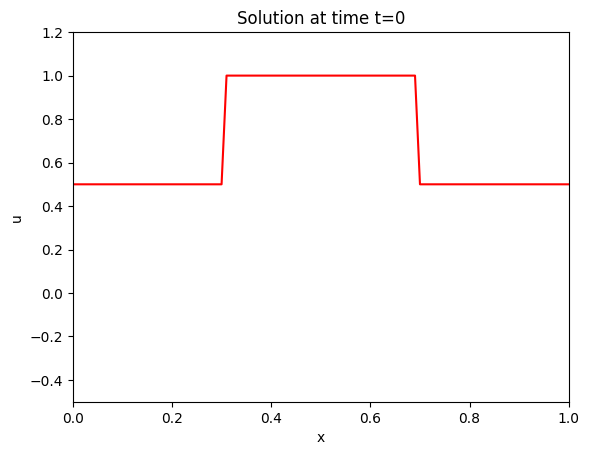

Computing at time 0.1


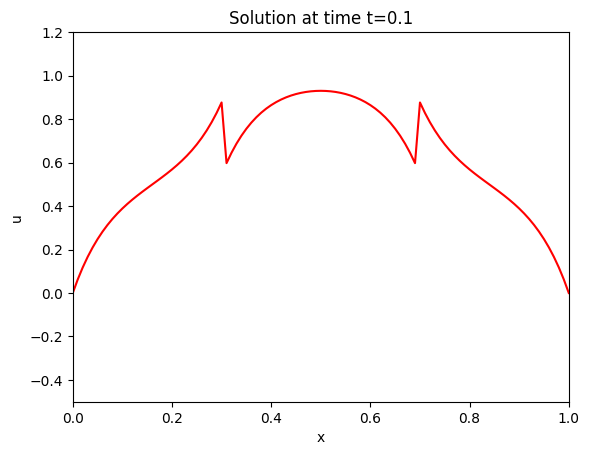

0.15100255842642019
0.07233874946859062
Computing at time 0.2


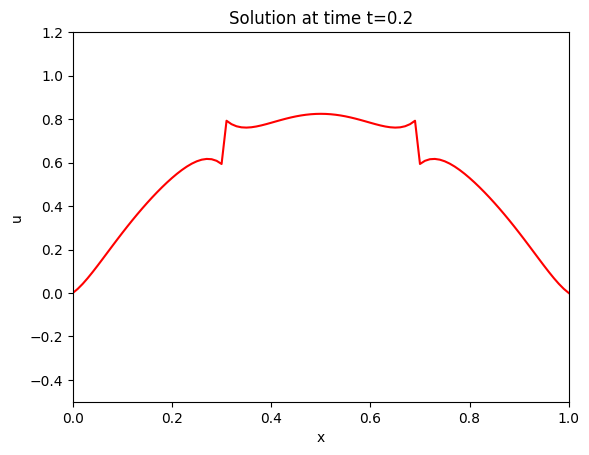

0.11522538167363605
0.0352542239734578
Computing at time 0.30000000000000004


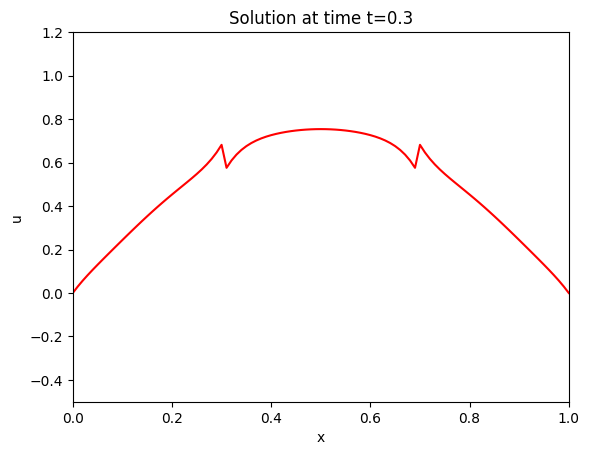

0.08229028537408545
0.023646652865980538
Computing at time 0.4


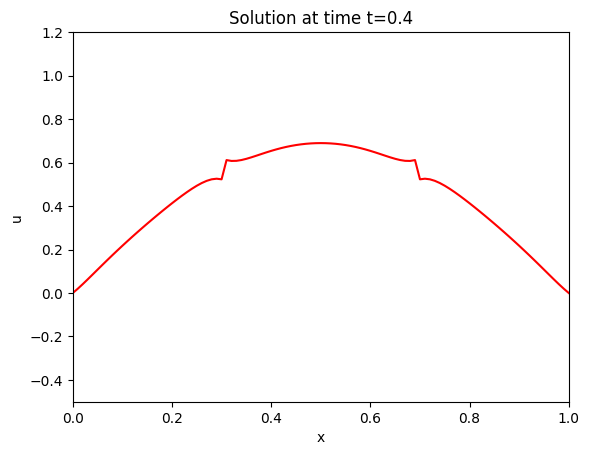

0.05702792209967977
0.01842479634300821
Computing at time 0.5


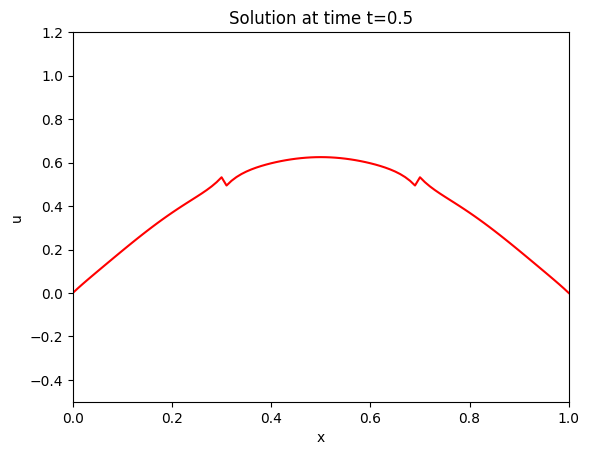

0.04173895092593666
0.015710245506478267
Computing at time 0.6


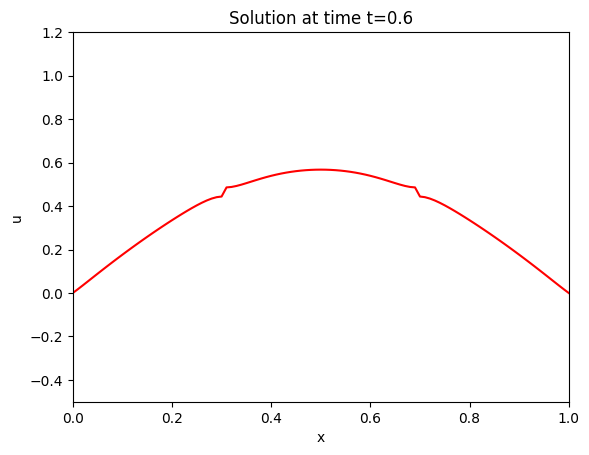

0.03185794856469193
0.014023625973381512
Computing at time 0.7


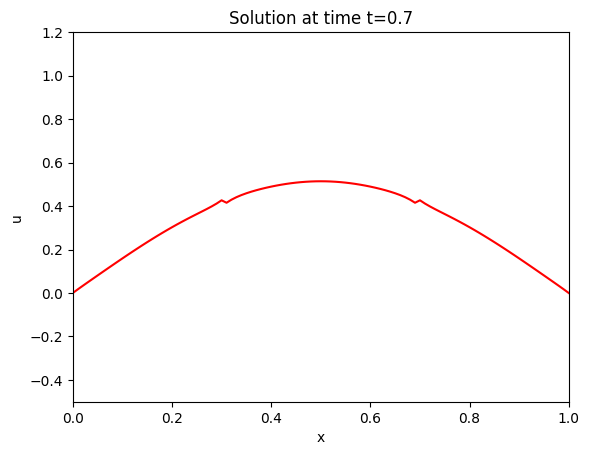

0.024740483707462402
0.012785621171752621
Computing at time 0.7999999999999999


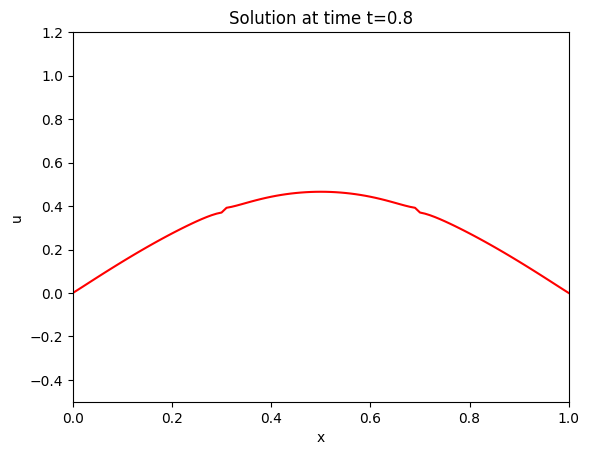

0.020356216152484008
0.01176967257019267
Computing at time 0.8999999999999999


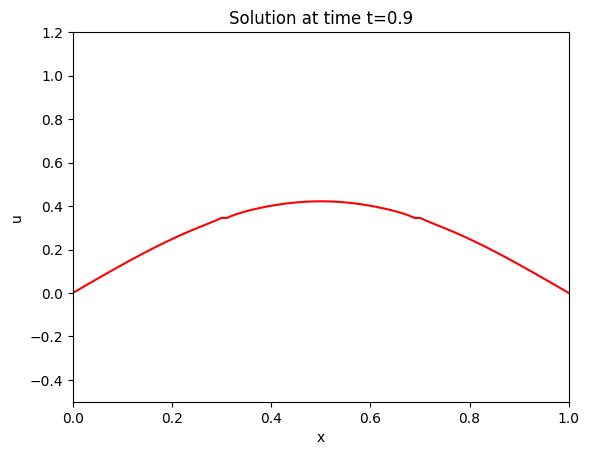

0.01674021144886101
0.010878733268714226
Computing at time 0.9999999999999999


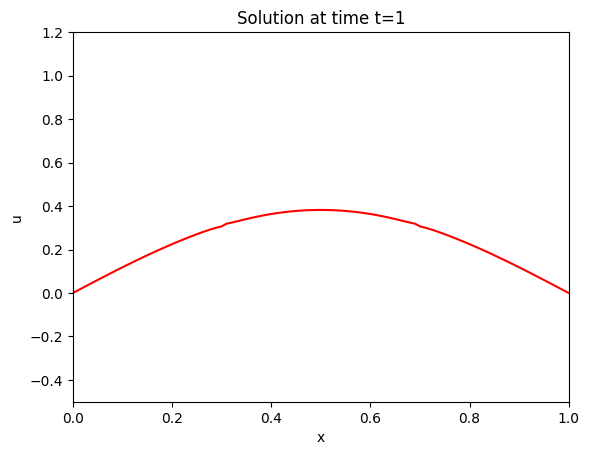

0.014578419155746258
0.010071849986154966
Computing at time 1.0999999999999999


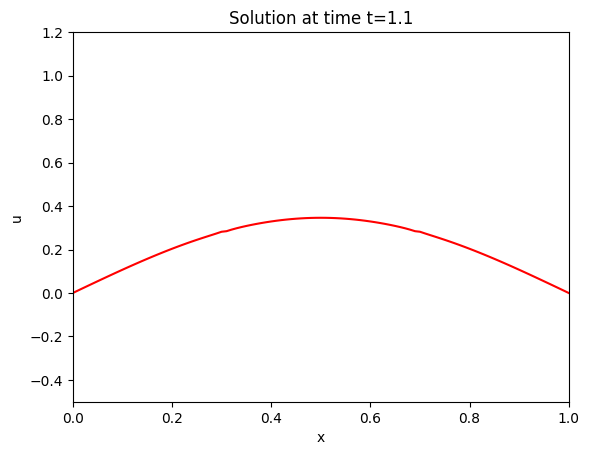

0.013176952159033861
0.009329027663494764
Computing at time 1.2


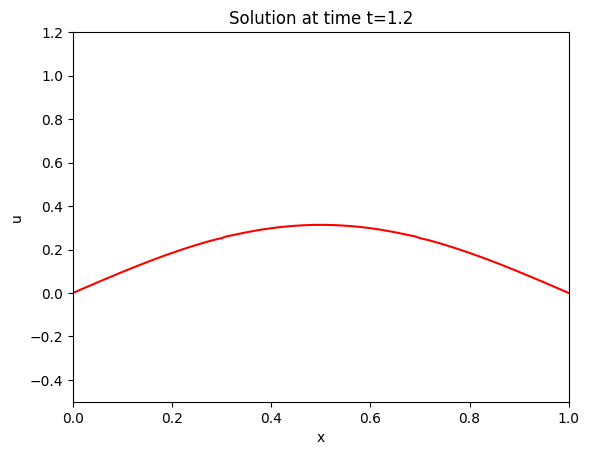

0.01220758735888422
0.008640619088024624
Computing at time 1.3


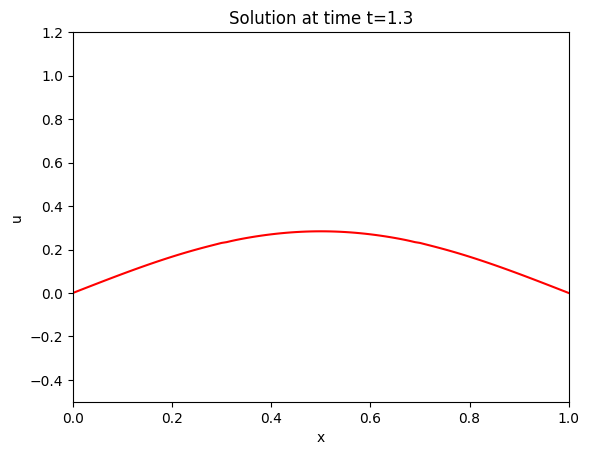

0.011313432075706453
0.008000606251862453
Computing at time 1.4000000000000001


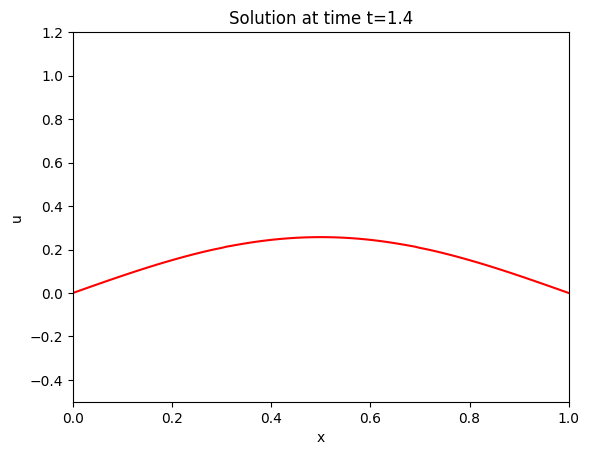

0.010469117237194986
0.007405131336023509
Computing at time 1.5000000000000002


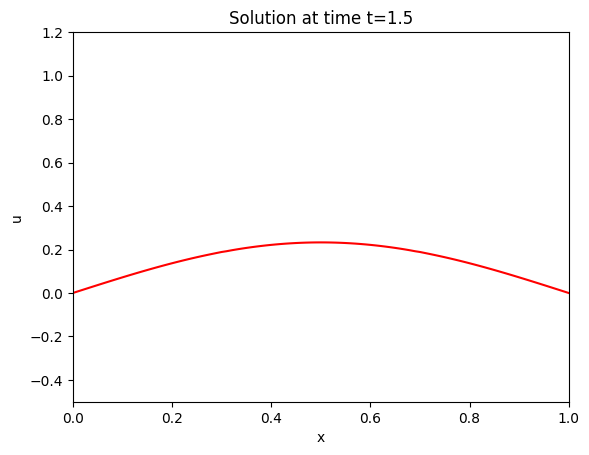

0.009689221276785231
0.006851001617231673
Computing at time 1.6000000000000003


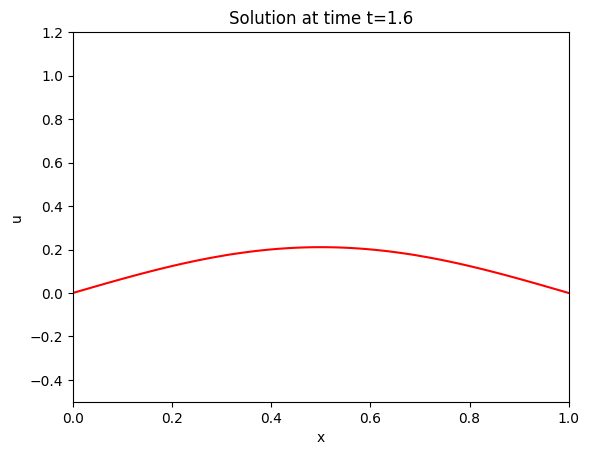

0.008958964986503448
0.006335575683807615
Computing at time 1.7000000000000004


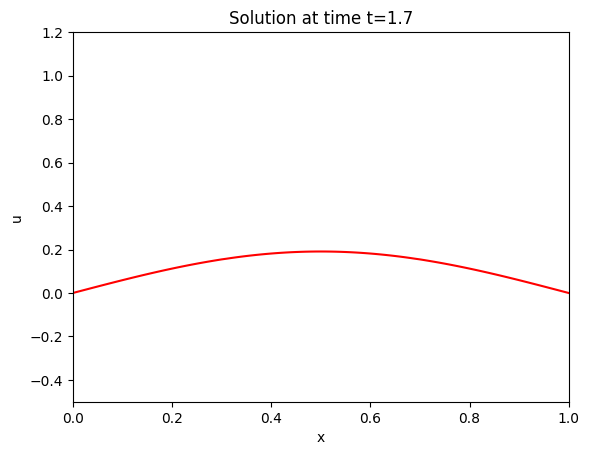

0.008282483066245572
0.00585638127436322
Computing at time 1.8000000000000005


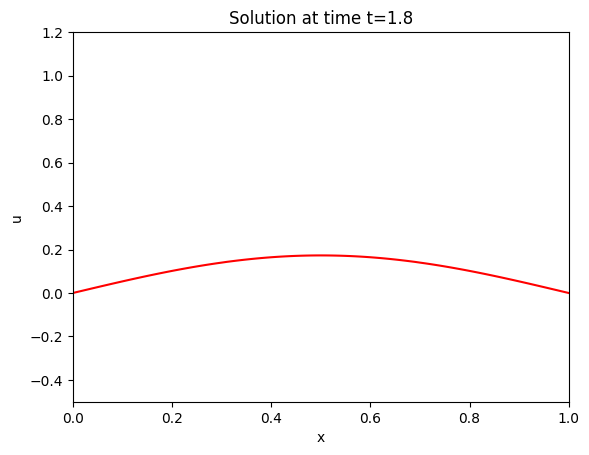

0.007652334275661976
0.005411156579207558
Computing at time 1.9000000000000006


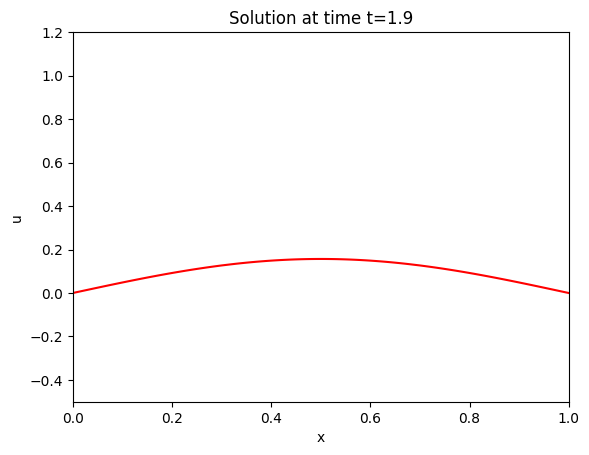

0.007068020441080625
0.004997738381245596
Computing at time 2.0000000000000004


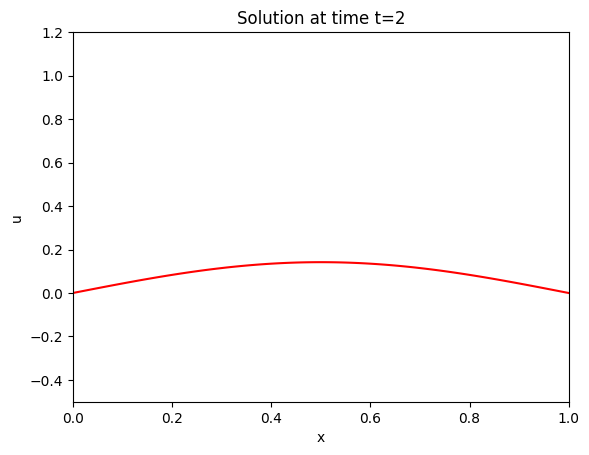

0.006525309834144483
0.0046140945748883765
Computing at time 2.1000000000000005


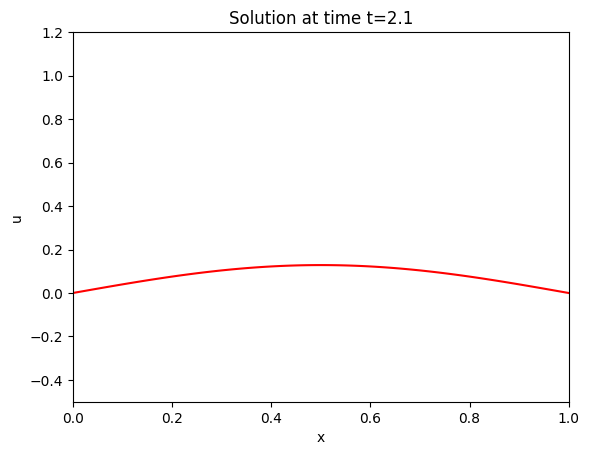

0.006022207679955663
0.00425828660993805
Computing at time 2.2000000000000006


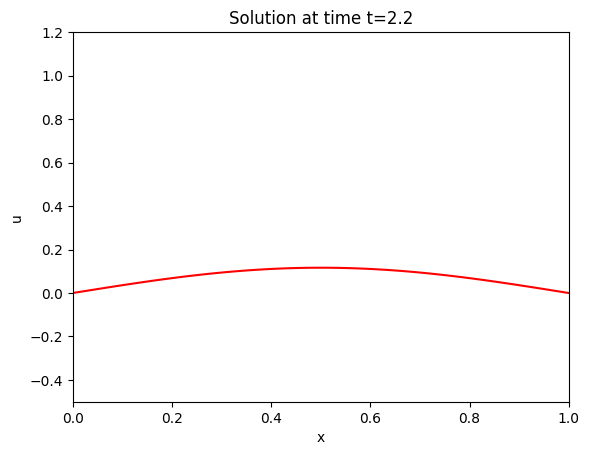

0.005555755902781068
0.003928484537254601
Computing at time 2.3000000000000007


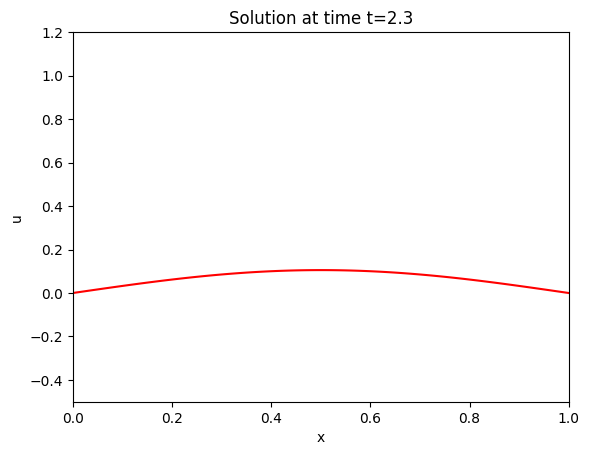

0.005123682146556632
0.0036229520588554297
Computing at time 2.400000000000001


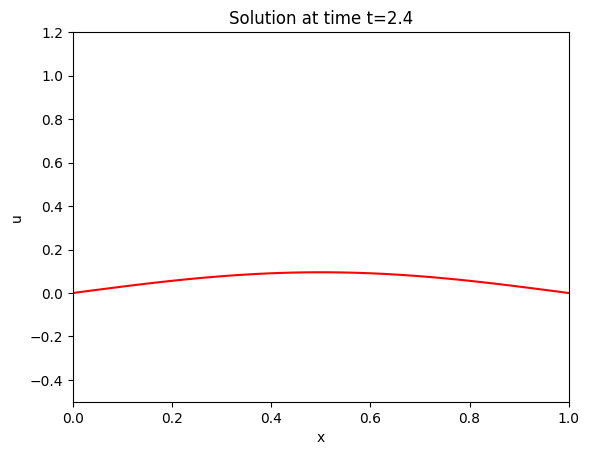

0.004723590791860965
0.0033400514808135783
Computing at time 2.500000000000001


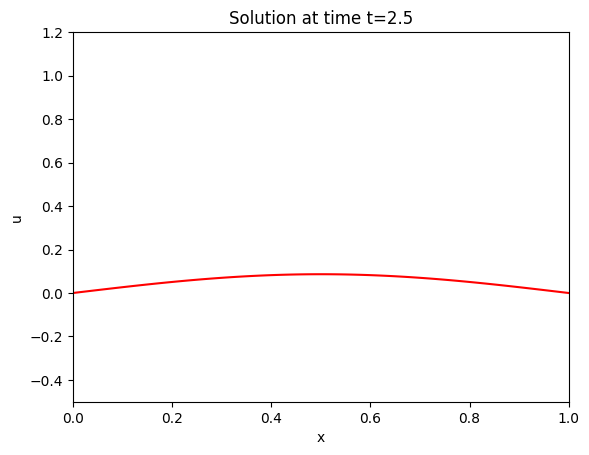

0.004353325849358894
0.003078236102851861
Computing at time 2.600000000000001


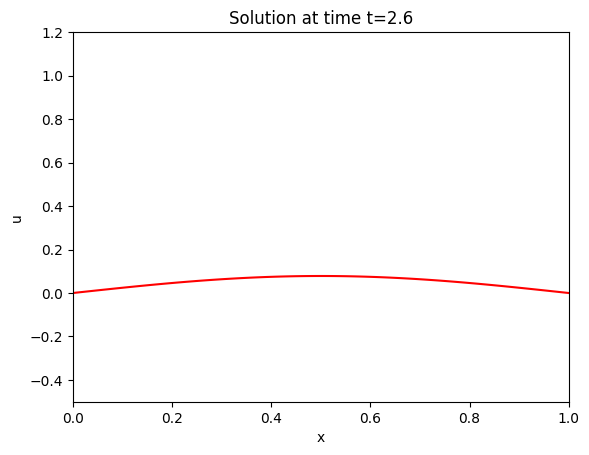

0.004010820848091429
0.002836050296402898
Computing at time 2.700000000000001


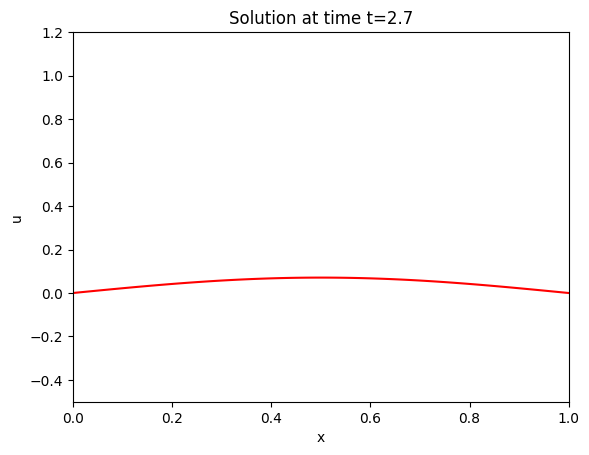

0.0036941374166984814
0.002612124354130803
Computing at time 2.800000000000001


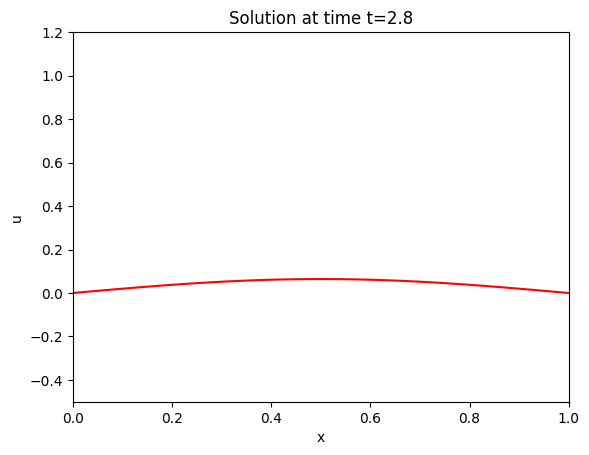

0.003401461477485497
0.002405172355514983
Computing at time 2.9000000000000012


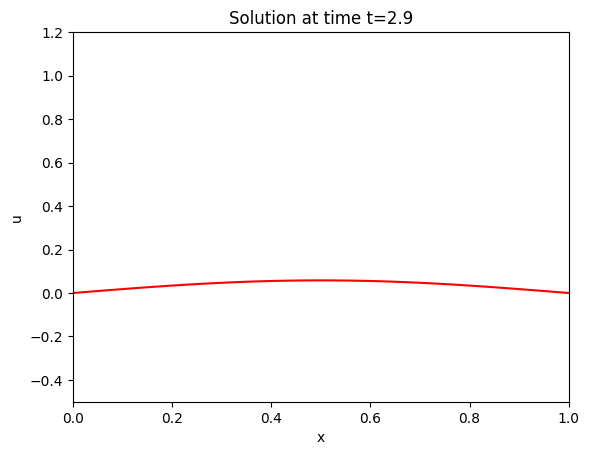

0.0031310821151134816
0.002213987873259801
Computing at time 3.0000000000000013


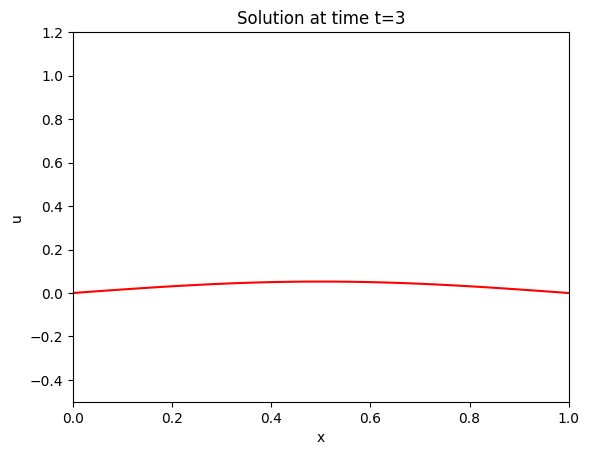

0.0028814052933192266
0.0020374408969548834
Computing at time 3.1000000000000014


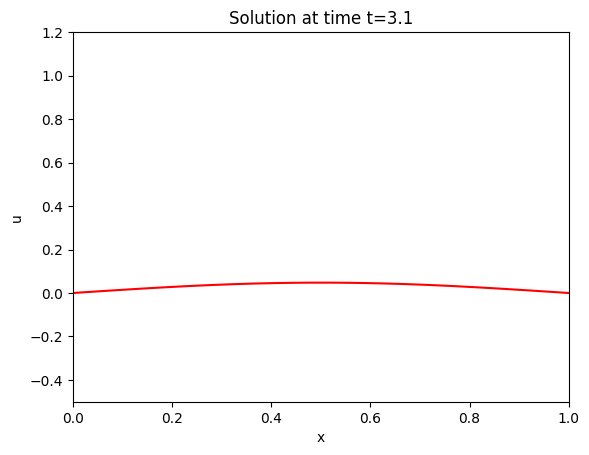

0.002650932334820083
0.0018744738940063511
Computing at time 3.2000000000000015


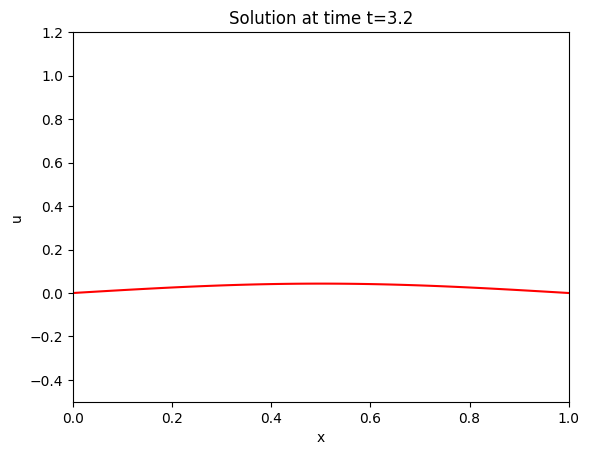

0.0024382675464406436
0.0017240984016283246
Computing at time 3.3000000000000016


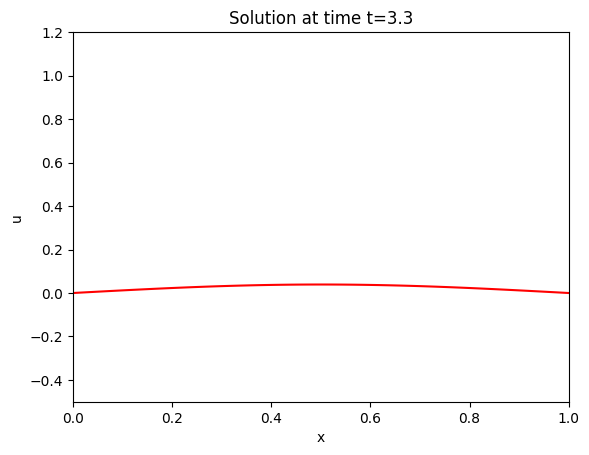

0.0022421039223915265
0.0015853913141477265
Computing at time 3.4000000000000017


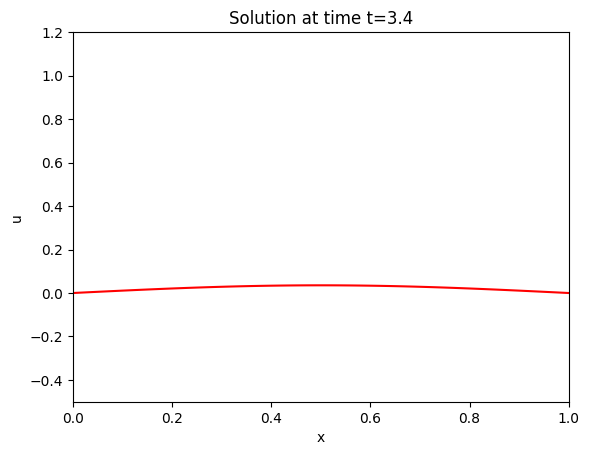

0.0020612245691669293
0.0014574914464208831
Computing at time 3.5000000000000018


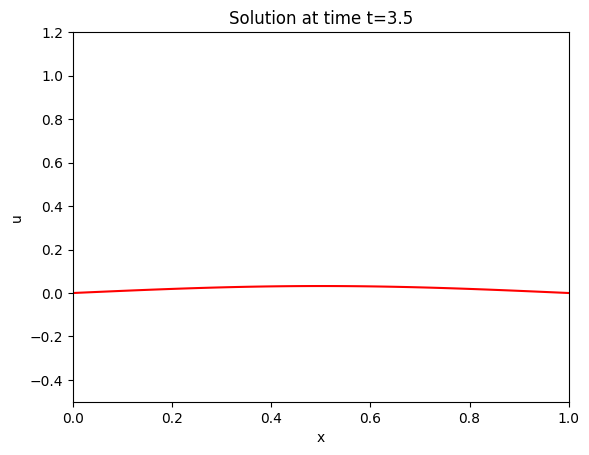

0.0018944935386032355
0.0013395960385683848
Computing at time 3.600000000000002


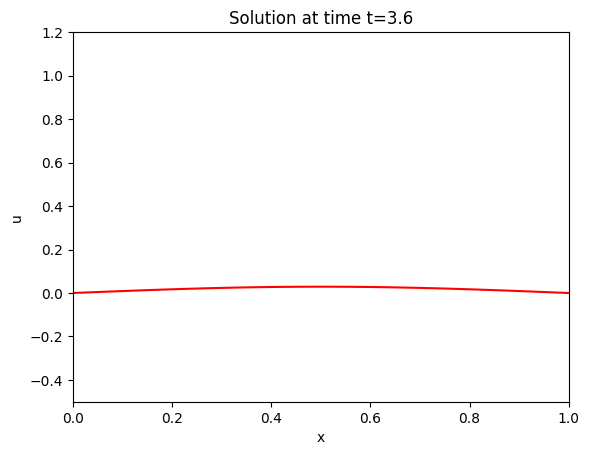

0.0017408539153934005
0.0012309574463407458
Computing at time 3.700000000000002


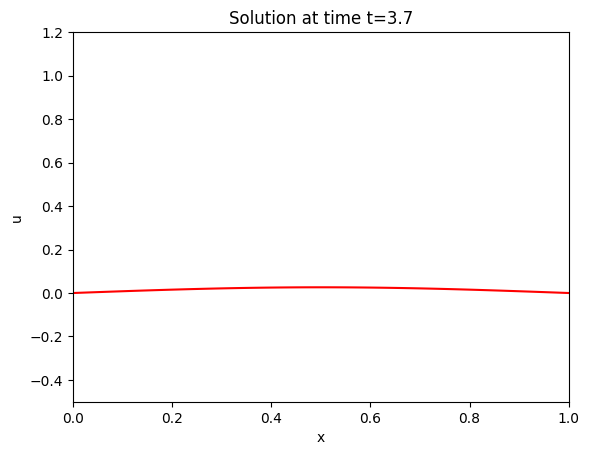

0.001599321433310985
0.0011308798834073015
Computing at time 3.800000000000002


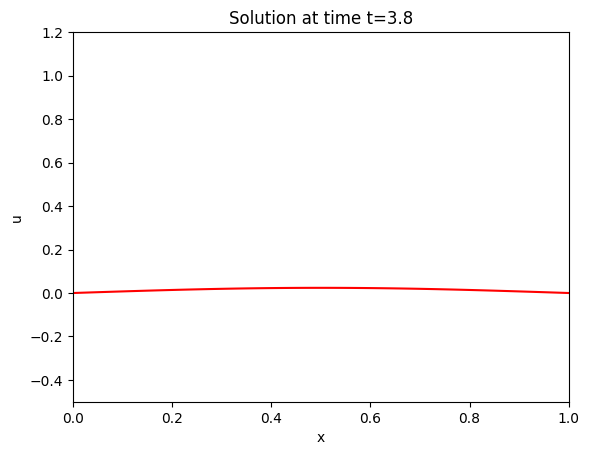

0.0014689812079924924
0.001038716318832599
Computing at time 3.900000000000002


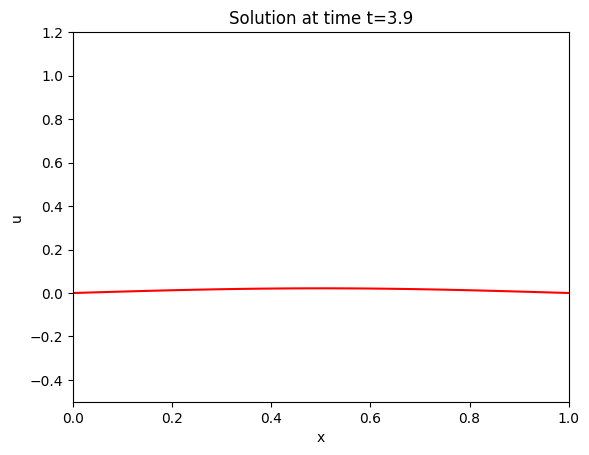

0.0013489827971281433
0.0009538654759727251
Computing at time 4.000000000000002


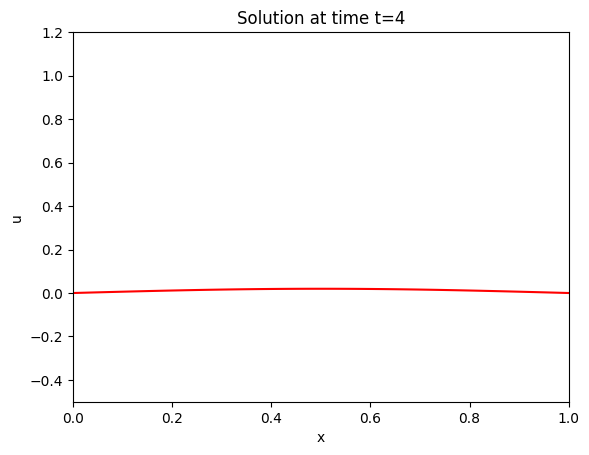

0.0012385365862012006
0.0008757689758875321
Computing at time 4.100000000000001


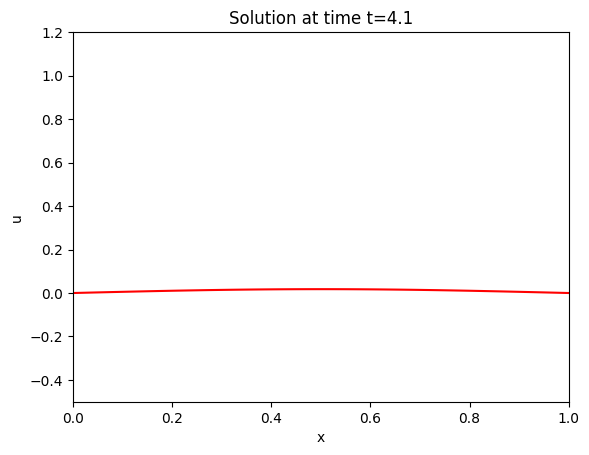

0.0011369096641989825
0.0008039086026461699
Computing at time 4.200000000000001


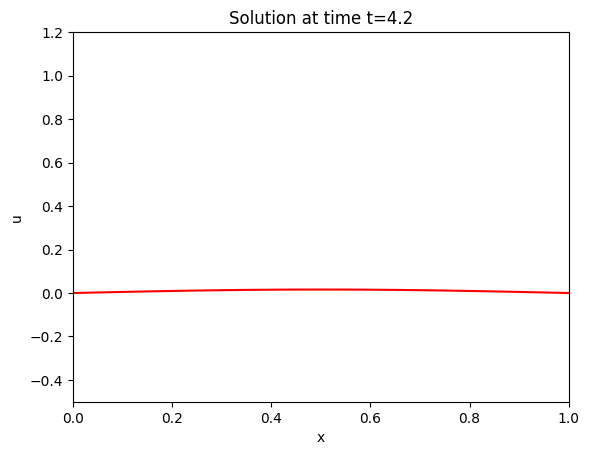

0.0010434223051403128
0.0007378037073483767
Computing at time 4.300000000000001


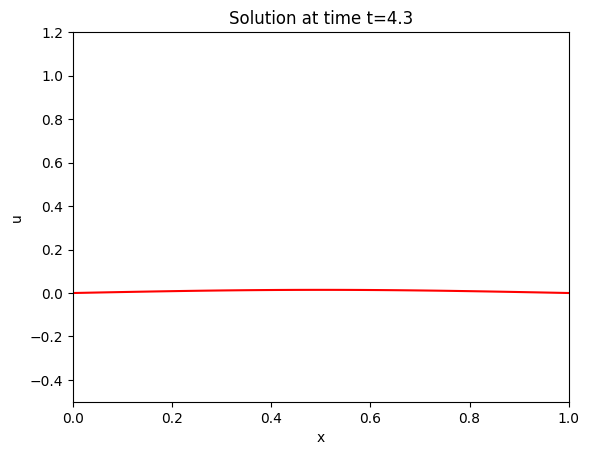

0.0009574443878234574
0.0006770087399268951
Computing at time 4.4


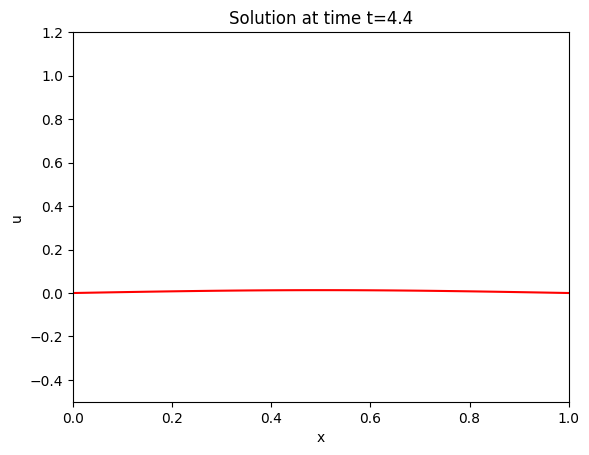

0.0008783921448397066
0.0006211109137488268
Computing at time 4.5


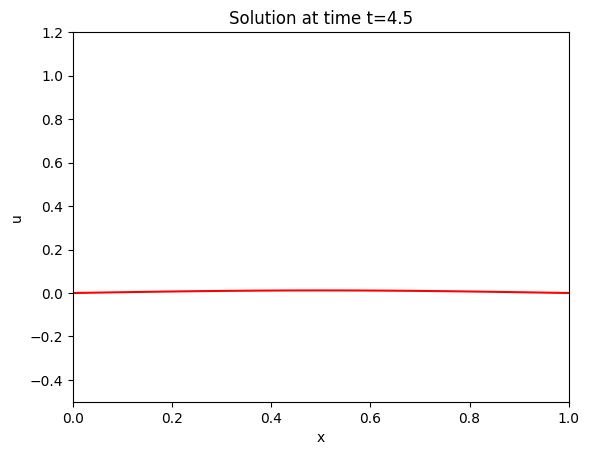

0.0008057250085199245
0.0005697279961854429
Computing at time 4.6


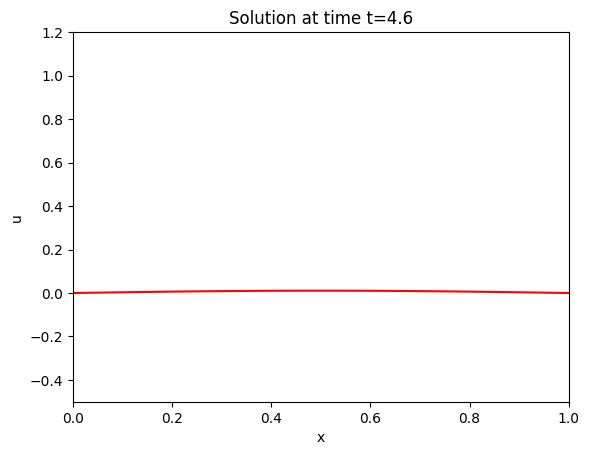

0.000738942680199051
0.0005225062247106493
Computing at time 4.699999999999999


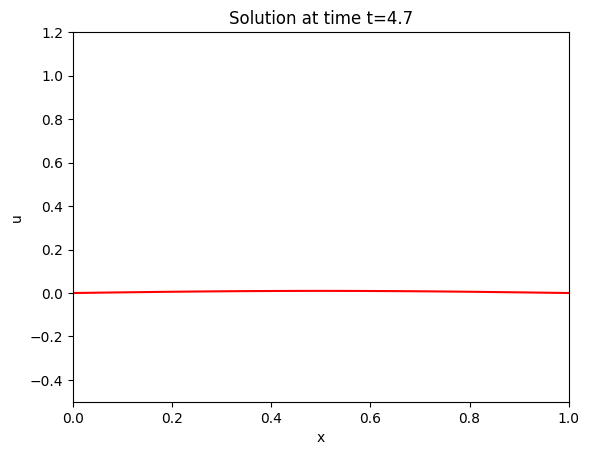

0.0006775823438942754
0.00047911834298337895
Computing at time 4.799999999999999


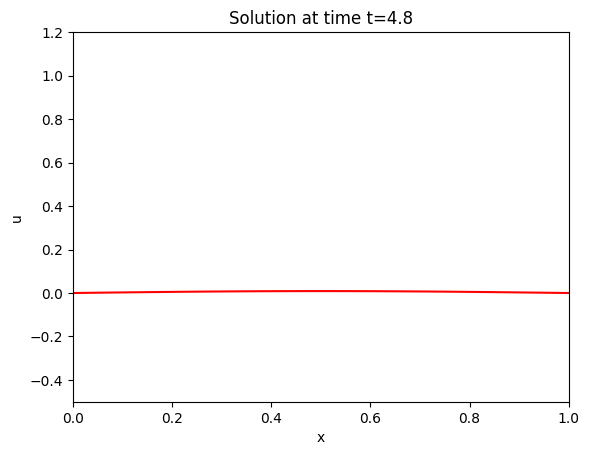

0.0006212160589999204
0.00043926175391214835
Computing at time 4.899999999999999


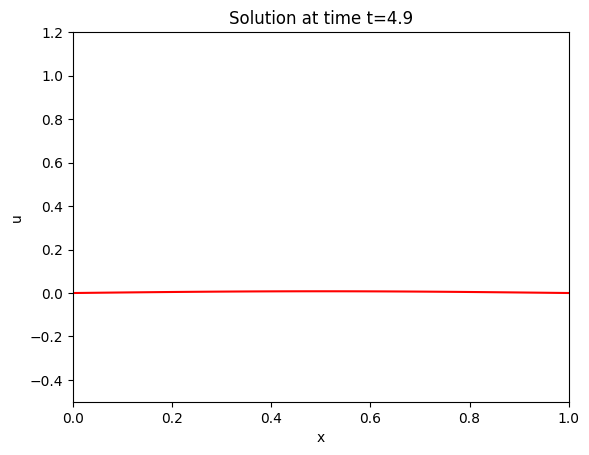

0.0005694483040257058
0.0004026567845002938
Computing at time 4.999999999999998


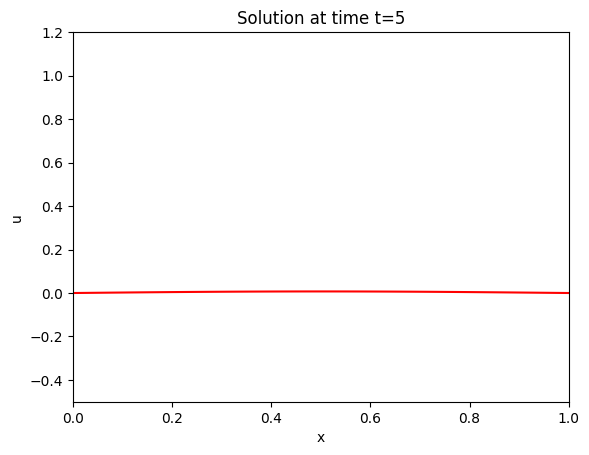

0.0005219136759854375
0.00036904505829896784
Error infinity 0.15100255842642019
Error L2(L2) 0.025138180888797032


In [40]:
# REM: We could factorize the matrix LeftM here

# Initial conditions
tc = 0 # current time
u_n = IC(x)
visualize(x,tc,u_n)

# TIME LOOP
for n in range(0,Nt):
    tc += dt
    print("Computing at time", tc)
    # right hand side
    b = dt*(th*f(x,tc)+(1-th)*f(x,tc-dt)) + RightM*u_n
    uL, uR = BC(xl,xr,tc)
    b[0] = aux_bc*uL
    b[-1] = aux_bc*uR
    u = sp.linalg.spsolve(LeftM, b)
    visualize(x,tc,u)
    u_n = u
#    error computing
    eil[n], el2l[n] = error_loc(u,u_ex(x,tc))

#"""
ei_tot = eil.max()
eL2 = np.sqrt(dt*(el2l[1:-2].T.dot(el2l[1:-2])) + dt/2*(el2l[0]**2+el2l[-1]**2))
print("Error infinity", ei_tot)
print("Error L2(L2)", eL2)
#"""